In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
#importing the dataset
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

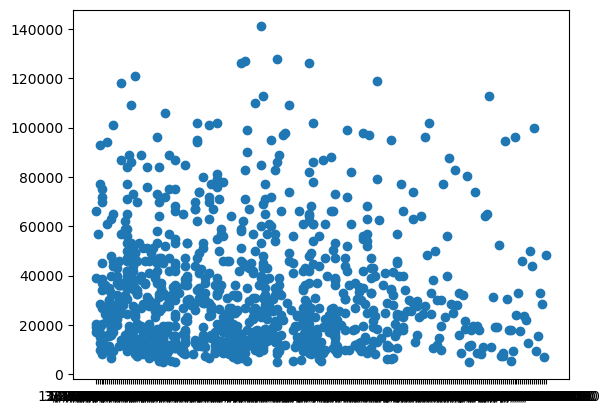

In [5]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

<Axes: ylabel='Frequency'>

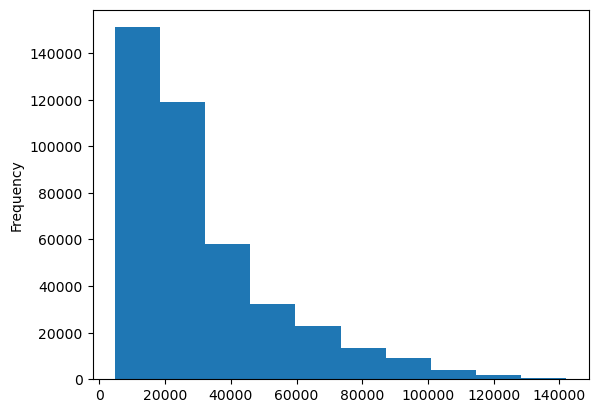

In [6]:
df['SalePrice'].plot.hist()

In [7]:
df['saledate'].dtype

dtype('O')

# Importing data with the date time component formatted correctly

In [8]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=['saledate'])

In [9]:
df['saledate']

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

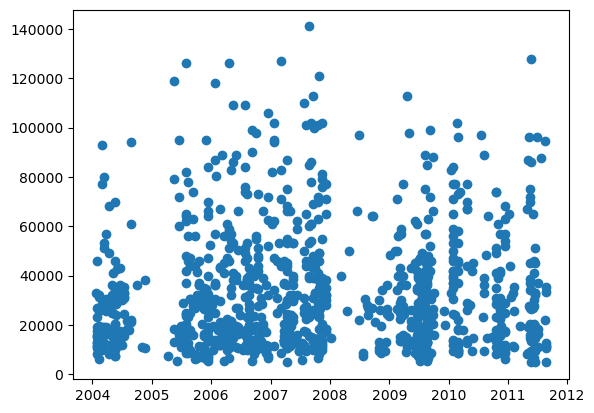

In [10]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
og_data = df.copy()
og_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sorting Data by Date

In [13]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [14]:
og_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df['saledate']

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

# Feature engineering

In [16]:
def create_features(df):
    """
    Function takes in a dataframe and adds date time features for 
    improved time series prediction.
    """
    df['saleDay'] = df['saledate'].dt.day
    df['saleMonth'] = df['saledate'].dt.month
    df['saleYear'] = df['saledate'].dt.year
    df['saleDayOfWeek'] = df['saledate'].dt.day_of_week
    df['saleDayOfYear'] = df['saledate'].dt.day_of_year
    df['saleQuarter'] = df['saledate'].dt.quarter
    df['saleIsMonthStart'] = df['saledate'].dt.is_month_start.astype(int)
    df['saleIsQuarterStart'] = df['saledate'].dt.is_quarter_start.astype(int)

    return df


In [17]:
df = create_features(df)
print(df.head())

        SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
205615      1974                       NaN       NaN 1989-01-17  ...   
274835      1980                       NaN       NaN 1989-01-31  ...   
141296      1978                       NaN       NaN 1989-01-31  ...   
212552      1980                       NaN       NaN 1989-01-31  ...   
62755       1984                       NaN       NaN 1989-01-31  ...   

       Differential_Type Steering_Controls saleDay saleMonth saleYear  \
205615               NaN             

<Axes: ylabel='Frequency'>

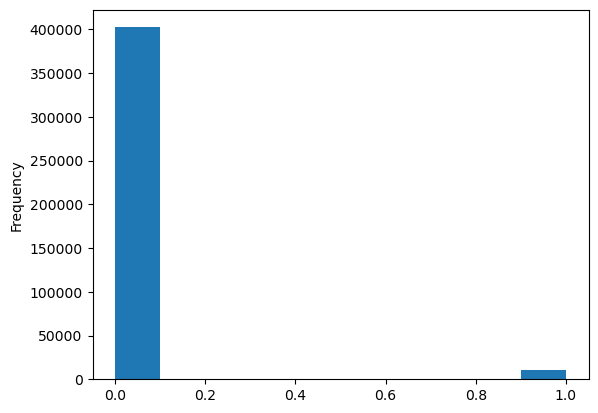

In [18]:
df["saleIsMonthStart"].plot.hist()

<Axes: ylabel='Frequency'>

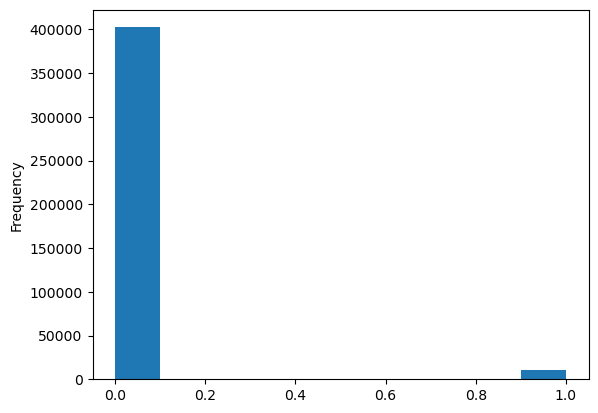

In [19]:
df["saleIsMonthStart"].plot.hist()

In [20]:
df.drop(['saledate'],axis=1,inplace=True)

# Checking datatypes

**Checking for non numeric features**

In [21]:
for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
def to_category(df):
    """
    Takes in a dataframe and converts the non numeric columns 
    into type category.
    """
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content) or  pd.api.types.is_object_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
    return df
        

In [23]:
df = to_category(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 60 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

**Reviewing conversion**

In [24]:
df['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

# Handling missing values

**Identifying columns with missing entries**

In [25]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum()>0:
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [26]:
def handle_missing_values(df):
    """
    Takes in a dataframe and imputes missing values. 
    For numeric columns simply fills the missing value with the median.
    For category type columns replace the existing -1 with 0 to ensure proper model training.
    """
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum()>0:
                 # Add a binary column which tells if the data was missing our not
                df[label+"_is_missing"] = pd.isnull(content)
                #median is more robust than the mean, mean is more sensitive to outliers for large datasets
                df[label].fillna(df[label].median(),inplace=True)
                
    # Turn categorical variables into numbers
    for label, content in df.items():
        # Check columns which *aren't* numeric
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to inidicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            content = content.astype(str)
            df[label] = pd.Categorical(content).codes+1   

    return df

In [27]:
df = handle_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 106 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(8), int64(5), int8(40)
memory usage: 77.9 MB


In [28]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 106, dtype: int64

# Splitting data for training and testing

In [29]:
df['saleYear']

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

**Training model for historial data upto 2012**

**Using 2012 data for validation**

In [30]:
#splitting data
df_valid = df[df['saleYear']==2012]
df_train = df[df['saleYear']!=2012]

len(df_valid ),len(df_train )

(11573, 401125)

# Splitting data into X and y

In [31]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 105), (401125,), (11573, 105), (11573,))

# Modelling

In [32]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_log_error,r2_score

def rmsle(y_test,y_pred):
    """
    returns the root mean squared log error
    """
    return np.sqrt(mean_squared_log_error(y_test,y_pred))
    
def show_score(model):
    """
    perform predictions and evaluates model performance based on:
    1. mean absolute error(MAE)
    2. mean absolute percentage error(MAPE) 
    3. root mean squared log error (rmse)
    4. r2 score
    """
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)
    scores = {
        "train_mean_absolute_error": mean_absolute_error(y_train,train_pred),
        "valid_mean_absolute_error": mean_absolute_error(y_valid,valid_pred),
        "train_mean_absolute_percentage_error": mean_absolute_percentage_error(y_train,train_pred)*100,
        "valid_mean_absolute_percentage_error": mean_absolute_percentage_error(y_valid,valid_pred)*100,
        "train rmsle": rmsle(y_train,train_pred),
        "valid rmsle": rmsle(y_valid,valid_pred),
        "train_r2_score": model.score(X_train,y_train),
        "valid_r2_score": model.score(X_valid,y_valid)
    }
    return scores
    
    

**Model training with XGBoost**

In [33]:
import xgboost as xg 

model = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 500, random_state=42,max_depth=10,learning_rate=0.01)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
#evaluate model performance
show_score(model)

{'train_mean_absolute_error': 4544.467691424509,
 'valid_mean_absolute_error': 6275.181697313386,
 'train_mean_absolute_percentage_error': 17.578311750912317,
 'valid_mean_absolute_percentage_error': 21.073818053326374,
 'train rmsle': 0.22092439233187386,
 'valid rmsle': 0.26095036576103503,
 'train_r2_score': 0.911189486983347,
 'valid_r2_score': 0.8689929599338475}

# Randomized CV for improved performance

In [38]:
#Randomized CV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

xgb_grid = {
    "booster": ['gbtree','gblinear'],
    "n_estimators":[200,300], # can have range from 100 to 500 for better results 
    "max_depth": [3,5,10],
    "learning_rate": [0.05,0.01,0.001]
}

xgb_model = RandomizedSearchCV(
    xg.XGBRegressor(n_jobs=-1, random_state=42),
    param_distributions = xgb_grid,
    n_iter = 10, # set to 100 more more robust exploration
    cv= 3 ,
)
xgb_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.01, 0.001],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [200, 300]})

In [39]:
show_score(xgb_model)

{'train_mean_absolute_error': 6083.357822649677,
 'valid_mean_absolute_error': 7505.762353038862,
 'train_mean_absolute_percentage_error': 25.958780570431923,
 'valid_mean_absolute_percentage_error': 26.178981788202506,
 'train rmsle': 0.2942758256094957,
 'valid rmsle': 0.3066500525565714,
 'train_r2_score': 0.8522004470595868,
 'valid_r2_score': 0.8177486058880783}

# Predicting prices for test data

**Importing Test Dataset**

In [40]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


# **Preprocessing Data**

1. Adding features
2. Datatype conversion
3. Handling missing values

In [41]:
#adding features
df_test = create_features(df_test)

#datatype conversion
df_test = to_category(df_test)

#missing values
df_test = handle_missing_values(df_test)

In [42]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 106 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(1), int16(3), int32(8), int64(6), int8(42)
memory usage: 2.2 MB


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 393123
Columns: 106 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(8), int64(5), int8(40)
memory usage: 75.7 MB


**Checking if both train and test sets are consistent**

In [45]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [46]:
df_test['auctioneerID_is_missing']=False
set(X_train.columns) - set(df_test.columns)

set()

In [47]:
df_test = df_test[X_train.columns]

**Performing predictions**

In [48]:
test_pred  =  model.predict(df_test)

In [49]:
len(test_pred)

12457

In [50]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_pred

# Prediction DataFrame

In [51]:
df_preds

,SalesID,SalesPrice
0,1227829,38324.359375
1,1227844,26507.007812
2,1227847,53165.707031
3,1227848,80384.796875
4,1227863,55631.558594
...,...,...
12452,6643171,75476.609375
12453,6643173,51755.074219
12454,6643184,18066.251953
12455,6643186,56280.140625


In [54]:
df_preds.to_csv('predictions',index=False)

# Visualizing feature importance

In [ ]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [55]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

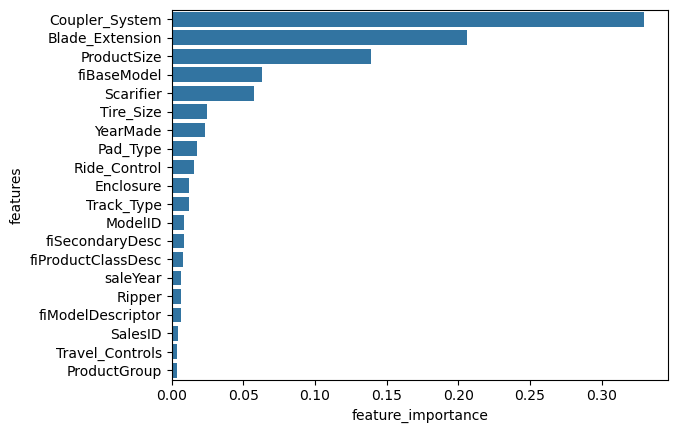

In [56]:
plot_features(X_train.columns, model.feature_importances_)